# Marketing expenses optimization


You've been offered an internship in the analytical department at Yandex.Afisha. Your first task is to help optimize marketing expenses.
You have:
Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
Dump file with all orders for the period
Marketing expenses statistics
You are going to study:
How people use the product
When they start to buy
How much money each customer brings
When they pay off


Step 1.

Download the data and prepare it for analysis
Store the data on visits, orders, and expenses in variables. 
Optimize the data for analysis. Make sure each column contains the correct data type.


clarification about whole project.

We are working on data from Yandex Afisha.Yandex Afisha is Russian-language service for selling tickets for entertainment events: theaters, concerts, movies, musicals, shows and other events.

The service opened in 2005 and contained movie, theater, concert and exhibition schedules.

In 2011, it became possible to buy cinema tickets. 

In 2015, there was a complete restart of the service (the architecture, design, partner model were updated ) and the purchase of tickets for concerts, performances, shows, musicals and children's events became available.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

visits=pd.read_csv(r'/datasets/visits_log_us.csv')
orders=pd.read_csv(r'/datasets/orders_log_us.csv')
costs=pd.read_csv(r'/datasets/costs_us.csv')

In [2]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


we can see that our first data set is a table with 359400 rows and 5 columns, it is a realtively big file so we will try to make some reduction in size if possible.Also we will transform all data related columns into apropriate date format

In [4]:
visits['Device']=visits['Device'].astype('category')

by changing type from object to categorie we can reduce its size which will help us when loading and working with data

In [5]:
visits.columns=visits.columns.str.lower()
orders.columns=orders.columns.str.lower()
costs.columns=costs.columns.str.lower()

all tables have columns names in Uper and lower case, gonna make all lower case as a regular procedure with data preprocessing

In [6]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end ts       359400 non-null object
source id    359400 non-null int64
start ts     359400 non-null object
uid          359400 non-null uint64
dtypes: category(1), int64(1), object(2), uint64(1)
memory usage: 57.9 MB


In [7]:
visits['start ts']=pd.to_datetime(visits['start ts'])
visits['end ts']=pd.to_datetime(visits['end ts'])

changing date related columns into apropriate type

In [8]:
visits.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end ts       359400 non-null datetime64[ns]
source id    359400 non-null int64
start ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


as we can see below we have reduced size from 57.9 to 11.3megs which is a great reduction

we will do the same with other two tables with colomns that need to be converted to time format

In [9]:
orders.head()

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [10]:
orders['buy ts']=pd.to_datetime(orders['buy ts'])

In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [12]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [14]:
costs['dt']=pd.to_datetime(costs['dt'])

In [15]:
costs.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Now we are gonna take a look for missing values in every table:

In [16]:
visits.isna().sum()

device       0
end ts       0
source id    0
start ts     0
uid          0
dtype: int64

In [17]:
orders.isna().sum()

buy ts     0
revenue    0
uid        0
dtype: int64

In [18]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

as we can see from the tables above there is no missing values at all in our data

In this phase we have optimised data for further analysis, we have managed to significantly lower its size and transformed all date related columns to apropriate format

# Product

**How many people use it every day, week, and month?**  

In order to answer to this question we will calculate daily , weekly and monthly active users DAU, WAU and MAU and first we will create separate columns for years, month, weeks and date...

DAU — the number of daily active (unique) users
WAU — the number of weekly active users
MAU — the number of monthly active users

In [19]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null category
end ts       359400 non-null datetime64[ns]
source id    359400 non-null int64
start ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [20]:
visits['session_year']=visits['start ts'].dt.year
visits['session_month']=visits['start ts'].dt.month
visits['session_week']=visits['start ts'].dt.week
visits['session_date']=visits['start ts'].dt.date

In [21]:
visits.head()

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


now we will calculate metrics by grouping data by session date/ week.

In [22]:
dau_total=visits.groupby('session_date').agg({'uid':'nunique'})
wau_total = visits.groupby(['session_year','session_week']).agg({'uid': 'nunique'})
mau_total=visits.groupby(['session_year','session_month']).agg({'uid': 'nunique'})

In [23]:
print('The number of daily active (unique) users:',visits.groupby('session_date').agg({'uid':'count'})
.mean())

The number of daily active (unique) users: uid    987.362637
dtype: float64


In [24]:
print('the number of weekly active (unique) users:',visits.groupby(['session_year','session_week']).agg({'uid': 'count'}).mean())

the number of weekly active (unique) users: uid    6781.132075
dtype: float64


In [25]:
print('number of monthly active (unique) users:',visits.groupby(['session_year','session_month']).agg({'uid': 'count'}).mean())

number of monthly active (unique) users: uid    29950.0
dtype: float64


Text(0, 0.5, 'Day')

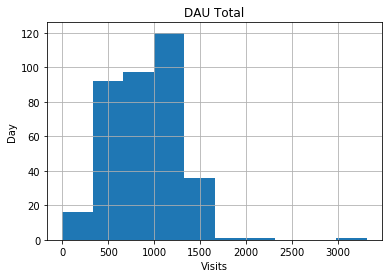

In [26]:
dau_total.hist();
plt.title('DAU Total')
plt.xlabel('Visits')
plt.ylabel('Day')

Text(0, 0.5, 'Month')

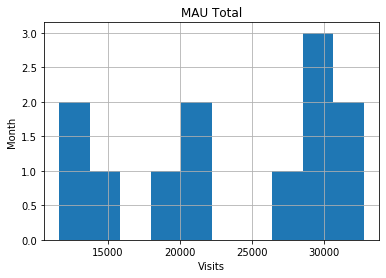

In [27]:
mau_total.hist();
plt.title('MAU Total')
plt.xlabel('Visits')
plt.ylabel('Month')

Text(0, 0.5, 'Weak')

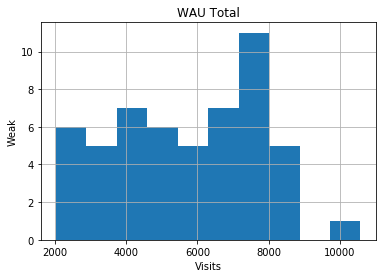

In [28]:
wau_total.hist();
plt.title('WAU Total')
plt.xlabel('Visits')
plt.ylabel('Weak')

We have calculated users metric, daily , weekly

and monthly active users DAU, WAU and MAU.

**How many sessions are there per day?...(One user might have more than one session.)**

Find out how many average sessions each user have on a daily basis 

to find out this we will simply divide number of session with number of users for a given period of time

In [29]:
sessions_per_user=visits.groupby(['session_year','session_month']).agg({'uid':['count','nunique']})
sessions_per_user.columns= ['n_sessions', 'n_users']
sessions_per_user['sessions_per_user'] =sessions_per_user['n_sessions'] / sessions_per_user['n_users']

In [30]:
print('The number of daily active (unique) users:',visits.groupby('session_date').agg({'uid':'count'})
.mean())
print('the number of weekly active (unique) users:',visits.groupby(['session_year','session_week']).agg({'uid': 'count'}).mean())
print('number of monthly active (unique) users:',visits.groupby(['session_year','session_month']).agg({'uid': 'count'}).mean())

The number of daily active (unique) users: uid    987.362637
dtype: float64
the number of weekly active (unique) users: uid    6781.132075
dtype: float64
number of monthly active (unique) users: uid    29950.0
dtype: float64


In [31]:
sessions_per_user.head()

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539

What is the length of each session?

 we will look for ASL - average session lenght
 
 and since the distribution is not normal we will use median

In [32]:

visits['session_duration_sec']=(visits['end ts']-visits['start ts']).dt.seconds

print(visits['session_duration_sec'].median())


300.0


In [33]:
visits.head()

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


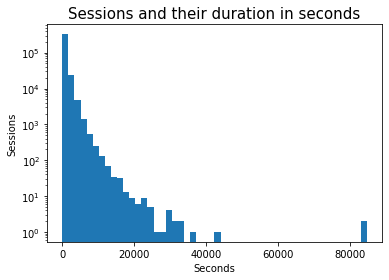

In [34]:

plt.hist(visits['session_duration_sec'], bins = 50, log = True)
plt.title("Sessions and their duration in seconds", fontsize=15)
plt.xlabel('Seconds')
plt.ylabel("Sessions")
plt.show()

from the distribution plot we can see that data is not normaly distributed, so for calculating mean values is better to use median

median session duration in seconds is 300 seconds 

How often do users come back?
In order to get this info we will reach for sticky factor, or loyalty of the audience, and it can be calculated by
the following : sticky factor= DAU/WAU, or sticky factor= DAU/MAU

In [35]:
dau=987.362637
wau= 6781.132075
mau=29950.0

sticky_factor=(dau/wau)
print(sticky_factor)

0.14560439556104648


In [36]:
sticky_factor=(dau/wau)
print('WAU sticky_factor is', sticky_factor)

WAU sticky_factor is 0.14560439556104648


Pie Chart of desktop device and source ID

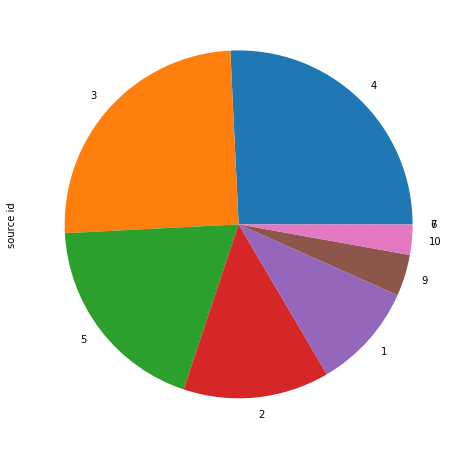

In [37]:
desktop_visits=visits.query('device=="desktop"')
(desktop_visits['source id'].value_counts()).plot(figsize=(8,8),subplots=True, kind='pie');

In [38]:
desktop_visits['source id'].value_counts()

4     67640
3     65777
5     50069
2     35661
1     25901
9     10119
10     7367
7        28
6         5
Name: source id, dtype: int64

Pie Chart of touch device and source ID

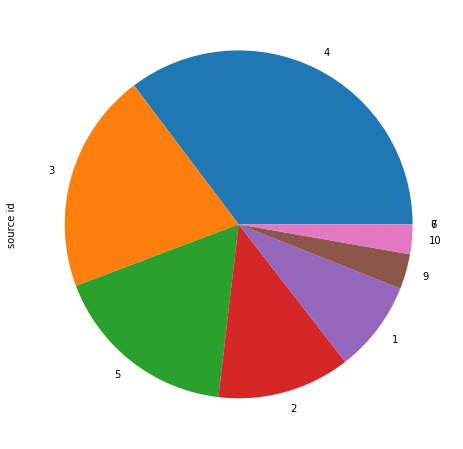

In [39]:
touch_visits=visits.query('device=="touch"')
(touch_visits['source id'].value_counts()).plot(figsize=(8,8),subplots=True,kind='pie');

Here The pie chart is showing how the source id with orders is distributed. How many users came form which source. So   4,3, 5 have the biggest amount of users. We can make conclusion that there is no much difference in device type, Touch and Desktop.

In [40]:
touch_visits['source id'].value_counts()

4     34154
3     19833
5     16836
2     11965
1      8220
9      3158
10     2658
7         8
6         1
Name: source id, dtype: int64

In [41]:
visits.device.value_counts()

desktop    262567
touch       96833
Name: device, dtype: int64

From this simple function we can see that there are almost 3 times  more people using Desktop vs Touch.That should also need to be considered when making business desicions...

In [42]:
user_activity = pd.read_csv(r'/datasets/visits_log_us.csv')

user_activity = user_activity.rename(columns = {'Uid': 'user_id'})
user_activity = user_activity.rename(columns = {'Start Ts': 'activity_date'})

user_activity['activity_date'] = pd.to_datetime(user_activity['activity_date'])
print(user_activity.head())

    Device               End Ts  Source Id       activity_date  \
0    touch  2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                user_id  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168  


### Cohort retention rate matrix by visits

In [43]:
first_activity_date = user_activity.groupby(['user_id'])['activity_date'].min()

first_activity_date.name = 'first_activity_date'

user_activity = user_activity.join(first_activity_date, on='user_id')

In [44]:
user_activity['activity_week'] = pd.to_datetime(user_activity['activity_date'], unit='d') - pd.to_timedelta(user_activity['activity_date'].dt.dayofweek, unit='d')
user_activity['first_activity_month'] = pd.to_datetime(user_activity['first_activity_date'], unit='d') - pd.to_timedelta(user_activity['first_activity_date'].dt.dayofweek, unit='d') 

In [45]:
user_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 8 columns):
Device                  359400 non-null object
End Ts                  359400 non-null object
Source Id               359400 non-null int64
activity_date           359400 non-null datetime64[ns]
user_id                 359400 non-null uint64
first_activity_date     359400 non-null datetime64[ns]
activity_week           359400 non-null datetime64[ns]
first_activity_month    359400 non-null datetime64[ns]
dtypes: datetime64[ns](4), int64(1), object(2), uint64(1)
memory usage: 21.9+ MB


In [46]:
user_activity['cohort_lifetime'] = ((user_activity['activity_date'] - user_activity['first_activity_date']) / np.timedelta64(1,'M')).astype(int)

In [47]:
#user_activity['cohort_lifetime'] = user_activity['activity_week'] - user_activity['first_activity_week']
#user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'] / np.timedelta64(1,'M')
#user_activity['cohort_lifetime'] = user_activity['cohort_lifetime'].astype(int) 

In [48]:
cohorts = user_activity.groupby(['first_activity_month','cohort_lifetime']).agg({'user_id':'nunique'}).reset_index() 

In [49]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_activity_month','user_id']]
print(initial_users_count) 

      first_activity_month  user_id
0      2017-05-29 00:01:00        2
2      2017-05-29 00:02:00        4
3      2017-05-29 00:03:00        1
5      2017-05-29 00:04:00        1
6      2017-05-29 00:07:00        1
...                    ...      ...
98558  2018-05-28 23:55:00        6
98559  2018-05-28 23:56:00        3
98560  2018-05-28 23:57:00        2
98561  2018-05-28 23:58:00        1
98562  2018-05-28 23:59:00        7

[59531 rows x 2 columns]


In [50]:
initial_users_count = initial_users_count.rename(columns={'user_id':'cohort_users'}) 

In [51]:
cohorts = cohorts.merge(initial_users_count,on='first_activity_month') 

In [52]:
cohorts['retention'] = cohorts['user_id'] / cohorts['cohort_users']

In [53]:
cohorts['first_activity_month'] = cohorts['first_activity_month'].astype('datetime64[M]')

In [54]:
retention_pivot = cohorts.pivot_table(index='first_activity_month',columns='cohort_lifetime',values='retention',aggfunc='sum')
retention_pivot

#sns.set(style='white')
#plt.figure(figsize=(20, 9))
#plt.title('Cohorts: User Retention')
#sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray')#

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_activity_month,,,,,,,,,,,,
2017-05-01,951.0,88.059524,70.650000,82.859524,91.659524,95.942857,81.842857,74.559524,76.620635,75.166667,60.926190,57.716667
2017-06-01,4210.0,204.280628,214.769877,253.758766,236.319481,238.466703,215.513889,198.798413,188.655159,162.801227,142.046825,88.234957
2017-07-01,5238.0,287.381854,305.235426,304.404004,292.210750,265.148449,246.024315,220.833045,160.419481,136.569084,65.513095,NaN
2017-08-01,3969.0,245.034921,227.605952,209.401190,160.551984,150.903571,148.314286,113.414286,92.811111,41.188095,NaN,NaN
2017-09-01,4470.0,303.137612,285.522414,192.972930,178.107393,159.441231,116.476299,111.423496,44.401959,NaN,NaN,NaN
2017-10-01,6009.0,362.610008,247.534558,229.311649,207.831449,143.273757,119.648098,55.996775,NaN,NaN,NaN,NaN
2017-11-01,4788.0,236.294885,203.373138,178.562267,129.253967,99.241885,47.432776,NaN,NaN,NaN,NaN,NaN
2017-12-01,4823.0,223.032154,167.102775,112.988893,96.266527,50.060076,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,5912.0,249.386892,175.708100,126.901079,48.538131,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cohort retention rate matrix by visits

General conclusion about Product part:

there is no significant difference between Desktop and Touch, both products show very similiar in a terms of results on source id distributions. Anyhow we can sugest to pay attention to following sources since they have most users.They are 4,3,and 5.

There are almost 3x more users that using Desktop vs the Touch, so we sugest to focuse more on this product

# Sales
When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d.

If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

How many orders do they make during a given period of time?

What is the average purchase size?

How much money do they bring? (LTV)

Gonna make first visit column, we need it to calculate difference between first visit and buy 

In [55]:
first_session=visits.groupby('uid')['start ts'].min().reset_index()

the first session dates grouped buy user id and time from earliest

In [56]:
first_buy=orders.groupby('uid')['buy ts'].min().reset_index()

same thing with first buy, grouped by user id and purchase time
now we will create new dataframe with these two slices

In [57]:
firsts=first_session.merge(first_buy, on='uid').reset_index()

In [58]:
firsts.columns=['index','uid','first_session','first_buy']

In [59]:
firsts.head()

,index,uid,first_session,first_buy
0,0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


now we need to subtract buy from start to find out time from visit to buy

In [60]:
firsts['buy_time']=firsts['first_buy']-firsts['first_session']
firsts.head()

,index,uid,first_session,first_buy,buy_time
0,0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00
1,1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00
2,2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00
3,3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00
4,4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00


gonna find average buy time  since the data dont have normal distribution we will use median instead of mean to get adequate results...

In [61]:
firsts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36523 entries, 0 to 36522
Data columns (total 5 columns):
index            36523 non-null int64
uid              36523 non-null uint64
first_session    36523 non-null datetime64[ns]
first_buy        36523 non-null datetime64[ns]
buy_time         36523 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), timedelta64[ns](1), uint64(1)
memory usage: 1.4 MB


In [62]:
print('Average buyin time is:',firsts['buy_time'].median(),'minutes')

Average buyin time is: 0 days 00:16:00 minutes


In [63]:
firsts['buy_time_minutes'] = round(firsts['buy_time']/np.timedelta64(1, 'm')).astype('int')

In [64]:
firsts.head()

,index,uid,first_session,first_buy,buy_time,buy_time_minutes
0,0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106 days 23:02:00,154022
1,1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0 days 00:00:00,0
2,2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0 days 01:19:00,79
3,3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0 days 19:44:00,1184
4,4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0 days 00:00:00,0


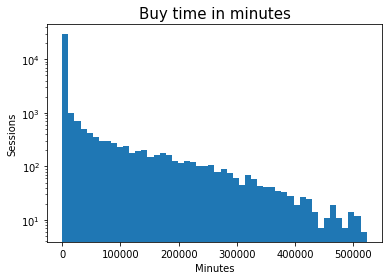

In [65]:
#firsts.buy_time.plot()
plt.hist(firsts['buy_time_minutes'], bins = 50, log = True)
plt.title("Buy time in minutes", fontsize=15)
plt.xlabel('Minutes')
plt.ylabel("Sessions")
plt.show()

from the graph we see how much the data is distorted, thats we we used meadian instead of mean

In [66]:
orders.head()

,buy ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [67]:
visits.head()

,device,end ts,source id,start ts,uid,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27,0


gonna do the same time grouping like we did with visits

In [68]:
orders['buy_year']=orders['buy ts'].dt.year
orders['buy_month']=orders['buy ts'].dt.month
orders['buy_week']=orders['buy ts'].dt.week
orders['buy_date']=orders['buy ts'].dt.date

In [69]:
orders.head().reset_index()

,index,buy ts,revenue,uid,buy_year,buy_month,buy_week,buy_date
0,0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01
1,1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01
2,2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01
3,3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01
4,4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01


In [70]:
buy_per_user=orders.groupby(['buy_year','buy_month']).agg({'uid':['count','nunique']})
buy_per_user.columns= ['n_sessions', 'n_users']
buy_per_user['buy_per_user'] =buy_per_user['n_sessions'] / buy_per_user['n_users']

How many orders do they make during a given period of time?

In [71]:
buy_per_user.head()

n_sessions  n_users  buy_per_user
buy_year buy_month                                   
2017     6                2354     2023      1.163618
         7                2363     1984      1.191028
         8                1807     1472      1.227582
         9                3387     2750      1.231636
         10               5679     4675      1.214759

In [72]:
#orders1=orders.join(visits.sort_values(by='start ts').groupby(['uid'])).agg({'start ts':'sum','source id':'nunique','device':'sum'})

In [73]:
#print(orders1.head())

In [74]:
first_order_date_by_customers = orders.groupby('uid')['buy_date'].min()
first_order_date_by_customers.name = 'first_order_date'
orders = orders.merge(first_order_date_by_customers,on='uid')
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')
orders['order_month'] = orders['buy_date'].astype('datetime64[M]')

In [75]:
orders_grouped_by_cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue':'sum','uid':'nunique'})

lets find a revenue per user:

In [76]:
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['uid']

In [77]:
orders_grouped_by_cohorts.head()

revenue   uid  revenue_per_user
first_order_month order_month                                 
2017-06-01        2017-06-01   9557.49  2023          4.724414
                  2017-07-01    981.82    61         16.095410
                  2017-08-01    885.34    50         17.706800
                  2017-09-01   1931.30    54         35.764815
                  2017-10-01   2068.58    88         23.506591

in a table above here we can see revenue per user

In [78]:
print('Average revenue per user is:',orders_grouped_by_cohorts['revenue_per_user'].mean())

Average revenue per user is: 14.733567597262237


Now we'll plot a pivot table that shows changes in revenue per user for cohorts by the purchase month and access changes
in revenue per user over time:

In [79]:
orders_grouped_by_cohorts.pivot_table(index='first_order_month',columns='order_month',values='revenue_per_user',aggfunc='mean')

order_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
first_order_month,,,,,,,,,,,,,
2017-06-01,4.724414,16.095410,17.706800,35.764815,23.506591,22.207761,31.011935,25.033191,19.295690,27.233556,25.681333,9.804151,NaN
2017-07-01,NaN,6.010218,12.396346,21.035965,10.786094,6.938163,7.896842,6.421111,6.992821,7.382143,12.861818,11.513846,NaN
2017-08-01,NaN,NaN,5.276518,11.148793,11.851321,12.182955,16.921250,12.139063,9.620333,12.610455,21.070000,8.307419,NaN
2017-09-01,NaN,NaN,NaN,5.644529,22.188385,13.445200,138.669189,19.881538,26.095000,27.437121,16.961351,11.044651,NaN
2017-10-01,NaN,NaN,NaN,NaN,5.003733,11.287427,6.753252,7.413152,7.072796,7.255139,6.573214,7.479701,NaN
2017-11-01,NaN,NaN,NaN,NaN,NaN,5.154683,7.339054,6.786583,12.510660,7.457284,4.580833,7.564839,NaN
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,4.738191,7.816575,39.366019,48.135052,27.431400,23.518413,NaN
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.135636,8.721228,12.365542,11.199767,4.699556,NaN
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.156987,8.610000,4.942414,6.941026,NaN


In [80]:
orders.head()

,buy ts,revenue,uid,buy_year,buy_month,buy_week,buy_date,first_order_date,first_order_month,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017,6,22,2017-06-01,2017-06-01,2017-06-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017,6,22,2017-06-01,2017-06-01,2017-06-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017,6,22,2017-06-01,2017-06-01,2017-06-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017,6,22,2017-06-01,2017-06-01,2017-06-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017,6,22,2017-06-01,2017-06-01,2017-06-01,2017-06-01


now we will calculate retention rates for cohorts

In [81]:
orders['first_order_month'] = orders['first_order_date'].astype('datetime64[M]')

orders['order_month'] = orders['buy ts'].astype('datetime64[M]')

In [82]:
orders['cohort_lifetime'] = orders['order_month'] - orders['first_order_month']
orders['cohort_lifetime'] = orders['cohort_lifetime'] / np.timedelta64(1,'M')
orders['cohort_lifetime'] = orders['cohort_lifetime'].round().astype(int)

In [83]:
cohorts = orders.groupby(['first_order_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()

In [84]:
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_order_month','uid']]
print(initial_users_count)

   first_order_month   uid
0         2017-06-01  2023
12        2017-07-01  1923
23        2017-08-01  1370
33        2017-09-01  2581
42        2017-10-01  4340
50        2017-11-01  4081
57        2017-12-01  4383
63        2018-01-01  3373
68        2018-02-01  3651
72        2018-03-01  3533
75        2018-04-01  2276
77        2018-05-01  2988
78        2018-06-01     1


In [85]:
initial_users_count = initial_users_count.drop(78)

In [86]:
print(initial_users_count)

   first_order_month   uid
0         2017-06-01  2023
12        2017-07-01  1923
23        2017-08-01  1370
33        2017-09-01  2581
42        2017-10-01  4340
50        2017-11-01  4081
57        2017-12-01  4383
63        2018-01-01  3373
68        2018-02-01  3651
72        2018-03-01  3533
75        2018-04-01  2276
77        2018-05-01  2988


In [87]:
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'})

In [88]:
cohorts = cohorts.merge(initial_users_count,on='first_order_month')

In [89]:
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

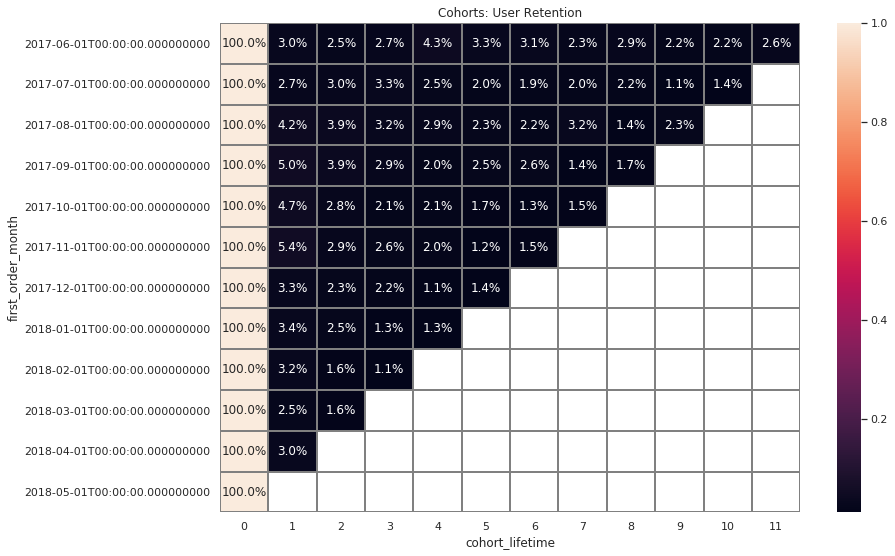

In [90]:
retention_pivot = cohorts.pivot_table(index='first_order_month',columns='cohort_lifetime',values='retention',aggfunc='sum')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray');

From the Retention rate heatmap we can make conclusions that first cohort makes best results in terms of retention rates.

In [91]:
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [92]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [93]:
#now we are going to calculate LTV

costs['month'] = costs['dt'].astype('datetime64[M]')

In [94]:
cohort_sizes = orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [95]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,2023,0,2023,2023,1.000000
1,2017-06-01,2023,1,61,2023,0.030153
2,2017-06-01,2023,2,50,2023,0.024716
3,2017-06-01,2023,3,54,2023,0.026693
4,2017-06-01,2023,4,88,2023,0.043500


In [96]:
cohorts = orders.groupby(['first_order_month','order_month']).agg({'revenue': 'sum'}).reset_index()
cohorts.head()

,first_order_month,order_month,revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


In [97]:
cohorts.tail()

,first_order_month,order_month,revenue
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76
78,2018-06-01,2018-06-01,3.42


we will delete last row since its out of our desired range 

In [98]:

cohorts= cohorts.drop(cohorts[cohorts['revenue'] == 3.42].index)

cohorts.tail()

,first_order_month,order_month,revenue
73,2018-03-01,2018-04-01,1063.05
74,2018-03-01,2018-05-01,1114.87
75,2018-04-01,2018-04-01,10600.69
76,2018-04-01,2018-05-01,1209.92
77,2018-05-01,2018-05-01,13925.76


In [99]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,order_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


In [100]:
margin_rate = .5

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head(10)

,first_order_month,n_buyers,order_month,revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4
5,2017-06-01,2023,2017-11-01,1487.92,743.960,5
6,2017-06-01,2023,2017-12-01,1922.74,961.370,6
7,2017-06-01,2023,2018-01-01,1176.56,588.280,7
8,2017-06-01,2023,2018-02-01,1119.15,559.575,8
9,2017-06-01,2023,2018-03-01,1225.51,612.755,9


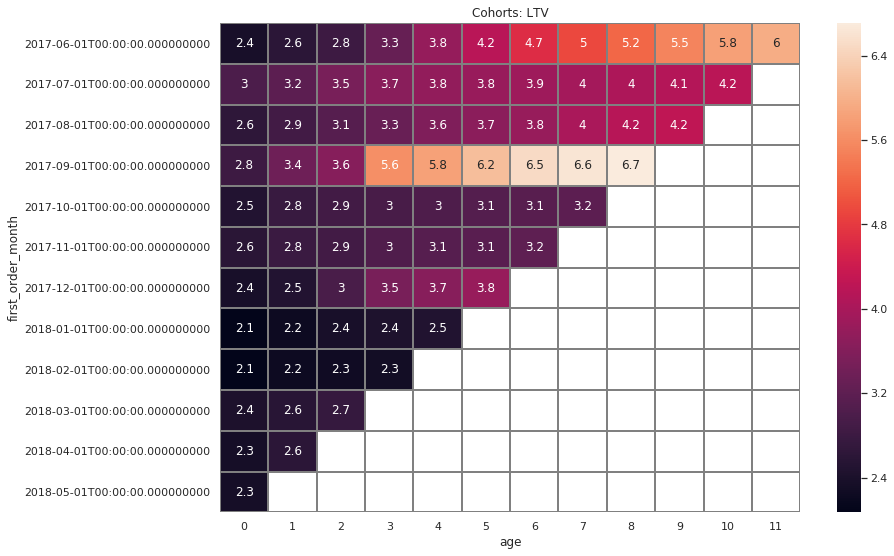

In [101]:
report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round(2).cumsum(axis = 1)

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: LTV')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray');


#output.fillna('')

In [102]:
ltv_201706=output.loc['2017-06-01'].mean()

In [103]:
ltv_201706

4.2675

From the Retention rate heatmap we can make conclusions that first cohort makes best results in terms of retention rates.From the LTV heatmap conclusions are that first and forth cohorts are the most promising.

# Marketing

* How much money was spent? Overall/per source/over time
* How much did customer acquisition from each of the sources cost?
* How worthwhile where the investments? (ROI)

In [104]:
monthly_costs = costs.groupby('month')['costs'].sum()
monthly_costs.head()

month
2017-06-01    18015.00
2017-07-01    18240.59
2017-08-01    14790.54
2017-09-01    24368.91
2017-10-01    36322.88
Name: costs, dtype: float64

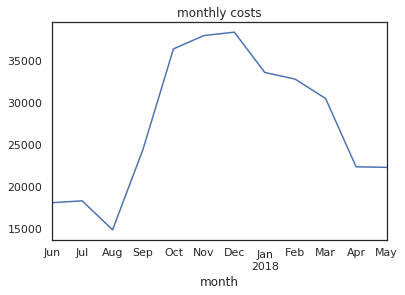

In [105]:
monthly_costs.plot(title='monthly costs');


From the plot we can see that the costs are relatively low in Juny and July, then have sudden drop from July to August and from the August they tent to grow to October, November and reaching they peak in December, after that they starting to fall...

Ok since we dealing here with movies, theathers and music events, main season is winter and autumn, and during the summer people are mostly taking vacations so its obvious that best time to sell is the autumn and winter.

In [106]:
cost_per_source=costs.groupby('source_id')['costs'].sum()

In [107]:
cost_per_source.head()

source_id
1     20833.27
2     42806.04
3    141321.63
4     61073.60
5     51757.10
Name: costs, dtype: float64

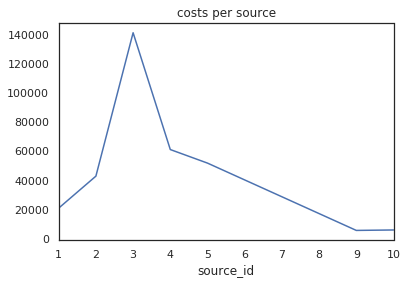

In [108]:
cost_per_source.plot(title='costs per source');

From the graph we see that source 3 is the most expensive, while 9 and 10 relatively cheap.4,5,6,7 and 2 are somewhere in between these two extremes.

In [109]:
report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_['cac'] = report_['costs'] / report_['n_buyers']
report_.head()

,first_order_month,n_buyers,order_month,revenue,gp,age,ltv,costs,cac
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0,2.362207,18015.0,8.905091
1,2017-06-01,2023,2017-07-01,981.82,490.910,1,0.242664,18015.0,8.905091
2,2017-06-01,2023,2017-08-01,885.34,442.670,2,0.218819,18015.0,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3,0.477336,18015.0,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4,0.511265,18015.0,8.905091


In [110]:
costs.rename(columns = {'source_id':'source id'}, inplace =True) 
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 4 columns):
source id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
month        2542 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1)
memory usage: 79.6 KB


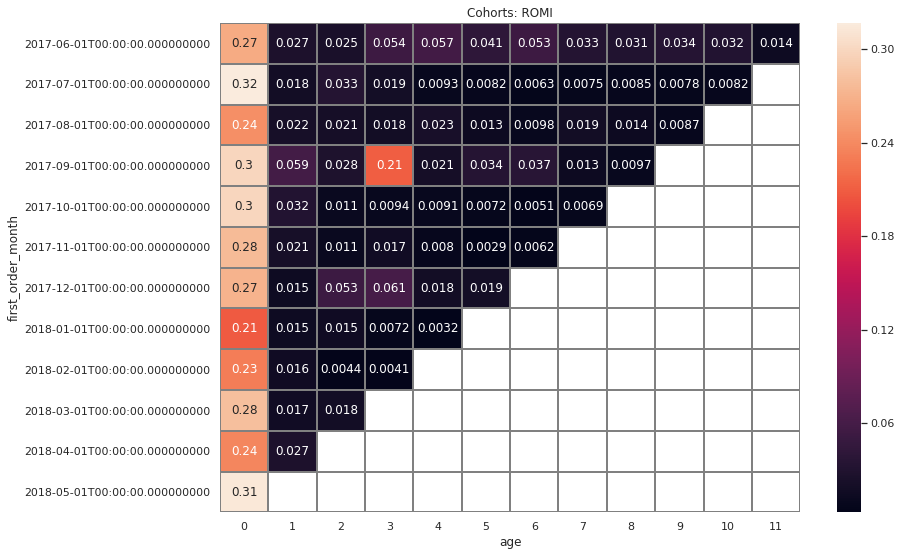

In [111]:
report_['romi'] = report_['ltv'] / report_['cac']
output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts: ROMI')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray');

#output.cumsum(axis=1).round(2)

The first cohort shows the highest overal values of retention rates,while the fourth shows extremly high values for december (21%)

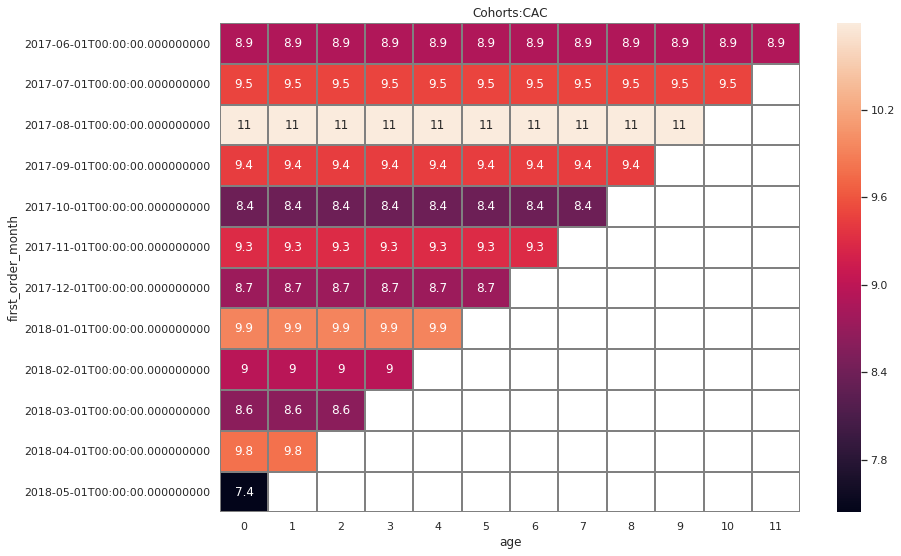

In [112]:

output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='cac', 
    aggfunc='mean')

sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohorts:CAC')
sns.heatmap(output, annot=True, linewidths=1, linecolor='gray');



now we are going to calculate total marketing costs for each source ( using groupby function)

In [113]:
marketing_costs_by_source=costs.groupby(['source id']).agg({'costs':'sum'}).reset_index()
marketing_costs_by_source.head(10)

,source id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


we have already comment costs per source...

now we are going to calculate unique users for each source from visits table

In [114]:
users_by_source=visits.groupby(['source id']).agg({'uid':'nunique'}).reset_index()
users_by_source.head(10)

,source id,uid
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974
5,6,6
6,7,34
7,9,9264
8,10,8067


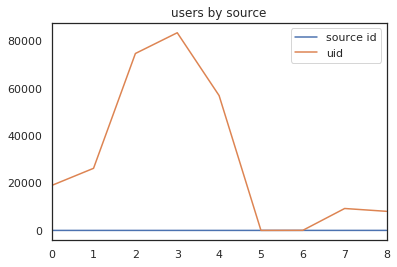

In [115]:
users_by_source.plot(title='users by source');

most productive sorces are 2,3 and 3 while 5,6 are the worst, 7 and 8 with very low values also

now we are going to merge this two and divide costs by user

In [116]:
marketing_costs=marketing_costs_by_source.merge(users_by_source,on='source id')
marketing_costs['costs_per_user']=marketing_costs['costs']/marketing_costs['uid']
marketing_costs.head(10).sort_values(by=['costs_per_user'])

,source id,costs,uid,costs_per_user
5,9,5517.49,9264,0.595584
6,10,5822.49,8067,0.721766
3,4,61073.60,83525,0.731201
4,5,51757.10,56974,0.908434
0,1,20833.27,18999,1.096546
1,2,42806.04,26245,1.631017
2,3,141321.63,74756,1.890439


we can see from the list bellow that source id 9 is most economic while source number 3 is most expencive almost 3x...
unfortunately here we cannot calculate ROI since we do have only marketing expencies and we can only calculate ROMI as well...

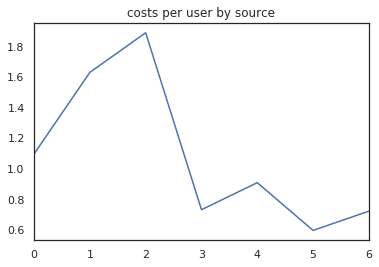

In [117]:
marketing_costs.costs_per_user.plot(title='costs per user by source');

General conclusions for the marketing part would be following:

-the most expensive source is 3th with lowest ROMI as well, while 1th, 2nd and 9th have best retention rates and ROMI,

-we can get best results from 1 source for 17-06 and 17-07 cohorts,from the 17-12 from the 2nd source and 17-09 from the 5th source and only those months shows paid off of the investments.

-in general there are no months that covers marketing costs over revenues  and there is no source that will paid of on its investments as well.










We can sugest to our customer to put a focus on Desktop device as there are much more users that using this device in front of Touch device.Also the session lenght were longer on this device too.

When it comes to Cohorts,from the Retention rate heatmap we can make conclusions that first cohort makes best results in terms of retention rates.From the LTV heatmap conclusions are that first and forth cohorts are the most promising.

When we talk about a sources we can advice to put more accent on 